#### Implementação do algoritmo de Hill-Climbing seguindo o livro Essentials of Metaheuristics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

def hill_climbing(n, perc, prob, r, min, max, d, tweak, Quality):
    S = np.random.uniform(min * perc, max * perc, d)
    qS = Quality(S)
    for _ in range(n):
        if tweak == 1:
            R = Tweak_one(min, max, perc, d)
        elif tweak == 2:
            R = Tweak_two(min, max, r, prob, d, np.copy(S))
        qR = Quality(R)
        if qR < qS:
            S = R
            qS = qR
    return S, qS

#### Implementação dos algoritmos de Tweak

In [2]:
#Implementação do algoritmo 7 do livro Essentials of Metaheuristics
def Tweak_one(min, max, perc, d):
    V = np.random.uniform(min * perc, max * perc, d)
    return V

#Implementação do algoritmo 8 do livro Essentials of Metaheuristics
def Tweak_two(min, max, r, p, d, V):
    for i in range(d):
        if p >= np.random.rand():
            n = np.random.uniform(-r, r)
            while not (min <= V[i] + n <= max):
                n = np.random.uniform(-r, r)
            V[i] = V[i]+n
    return V

#### Implementação das funções de benchmark

In [3]:
def sphere_function(Z):
    return (Z**2).sum() - 1400

def ackley_function(Z):
    res = -20 * np.exp(-0.2 * np.sqrt(np.mean(Z**2)))
    res = res - np.exp(np.mean(np.cos(2*np.pi*Z))) + 20 + np.e - 700
    return res

#### Casos de teste, utilizando a primeira versão do Tweak
O gráfico é dado pelo percentual de variação do valor mínimo e máximo do vetor, e o cálculo da função de qualidade dentro desse vetor. Foi utilizado 100 mil iterações do hill climbing.

É possível notar que utilizando a Sphere Function os valores são muitos dispersos, variando de 80000 até cerca de -1400, apesar de ser muito discrepante a diferença, nos valores de percentuais mais baixos a função se aproxima muito do ótimo.

Na Ackley Function os valores são mais homogêneos, variando cerca de -700 até -670.

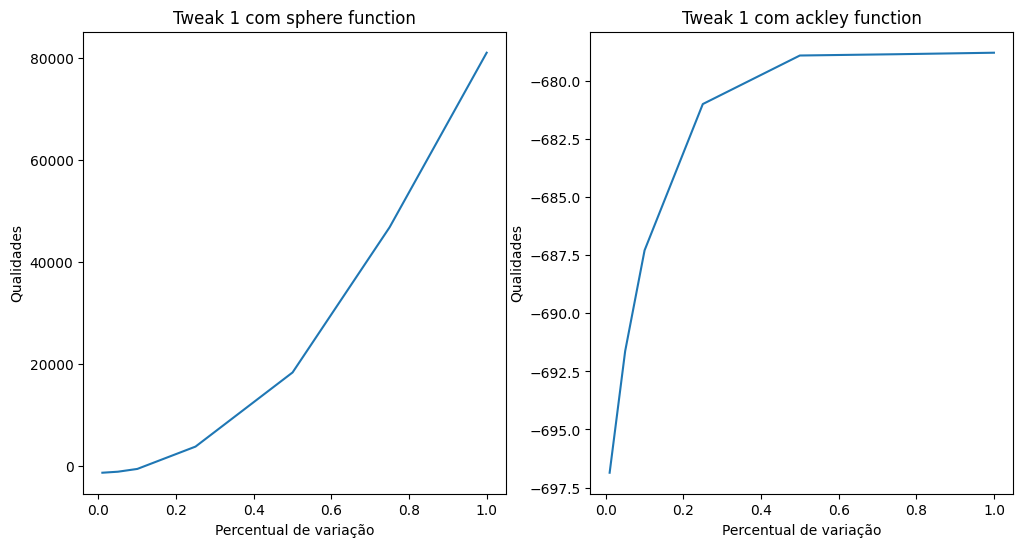

In [4]:
def plota(q1, q2, perc, i, x_label):
    def p(qualities, perc, title, x_label):
        plt.title(title)
        plt.plot(perc, qualities)
        plt.ylabel('Qualidades')
        plt.xlabel(x_label)
        
    plt.figure(figsize = ((12, 6)))
    plt.subplot(1,2,1)
    p(q1, perc, 'Tweak ' + i + ' com sphere function', x_label)
    plt.subplot(1,2,2)
    p(q2, perc, 'Tweak ' + i + ' com ackley function', x_label)
    plt.show()


#Parametros utilizados nos testes
perc = [1, 0.75, 0.5, 0.25, 0.10, 0.05, 0.01]
min = -100    
max = 100
d = 50
q1 = []

#Utilizando a sphere_function
for p in perc:
    res, qRes = hill_climbing(100_000, p, None, None, min, max, d, 1, sphere_function)
    q1.append(qRes)

#Utilizando a ackley_function
q2 = []
for p in perc:
    res, qRes = hill_climbing(100_000, p, None, None, min, max, d, 1, ackley_function)
    q2.append(qRes)

plota(q1, q2, perc, '1', 'Percentual de variação')

#### Casos de teste, utilizando a segunda versão do Tweak

Foi utilizado uma matriz com alguns valores para o raio e a probabilidade, com isso foi feito o hill_climbing para encontrar qual seria a melhor combinação de raio e probabilidade para gerar a qualidade mais próxima do ótimo.

Com a melhor combinação encontrada anteriormente foi realizado um teste com quantidade de iterações variáveis para montar um gráfico Qualidade x Número de iterações. Isso foi feito utilizando ambas as funções de Qualidade definidas anteriormente.

Melhor combinação usando a Sphere Function encontrada: raio = 1, probabilidade = 0.1

Matriz raio x probabilidade:
            0.10         0.25          0.50          0.75          1.00
1  -1399.973644 -1398.729053  -1395.360349  -1390.647537  -1386.008758
2  -1399.933476 -1394.448087  -1382.920693  -1363.220828  -1345.218825
5  -1399.444013 -1362.448276  -1261.936053  -1193.396634  -1079.789141
10 -1397.738225 -1284.439171   -921.991440   -422.210725   -150.791605
20 -1393.965535  -694.363317    777.156019   2087.903284   4523.780258
30 -1388.044387  -120.706697   2708.004773   7138.143880   8980.616131
50 -1364.653494  2380.306031  11761.702614  19903.238054  26495.284313 


Melhor combinação usando a Ackley Function encontrada: raio = 50, probabilidade = 0.1

Matriz raio x probabilidade:
           0.10        0.25        0.50        0.75        1.00
1  -679.996157 -679.745073 -679.229476 -678.998568 -678.790996
2  -679.995345 -679.635869 -679.204850 -678.991353 -678.808214
5  -679

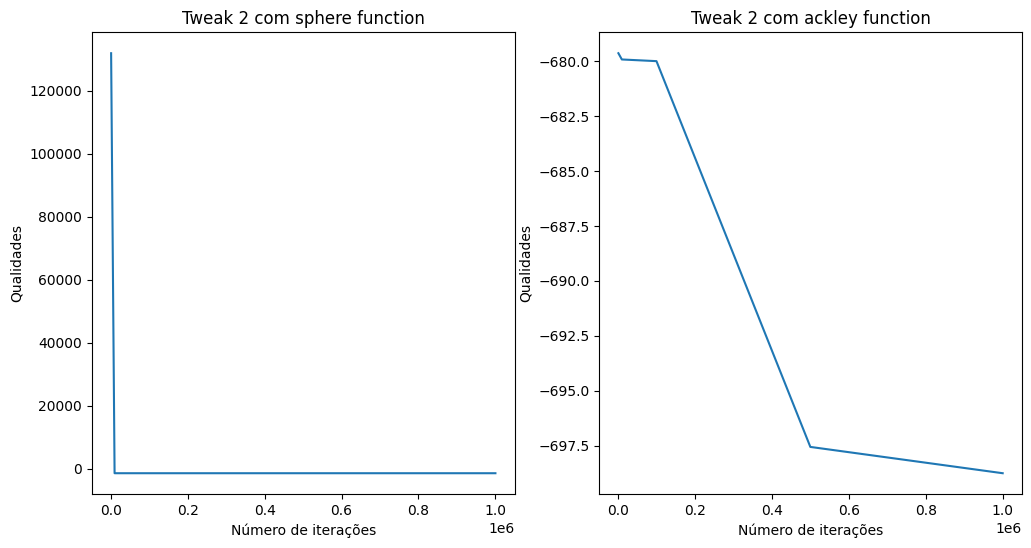

In [9]:
def grid_search(Quality, climbing):
    parametros = {'raio': [1, 2, 5, 10, 20, 30, 50],
                  'prob': [0.1, 0.25, 0.5, 0.75, 1]}
    best_res = None
    q_best = float(np.inf)
    best_comb = None
    i=0
    matriz_res = []
    for r in parametros['raio']:
        linha = []
        for p in parametros['prob']:
            res, quality = climbing(100_000, 1, p, r, min, max, d, 2, Quality)
            linha.append(quality)
            #print(i, '...', end=' ')
            i+=1
            if quality < q_best:
                q_best = quality
                best_res = res
                best_comb = (r, p)
        matriz_res.append(linha)
    matriz_res = DataFrame(matriz_res, columns = parametros['prob'], index = parametros['raio'])
    #print(q_best, best_res)
    return best_comb, matriz_res

def itera_teste(conf, Quality, iteracoes, climbing):
    r, p = conf
    qualities = []
    for i in iteracoes:
        res, quality = climbing(i, 1, p, r, min, max, d, 2, Quality)
        qualities.append(quality)
    return qualities

iteracoes = [1_000, 10_000, 100_000, 500_000, 1_000_000]
best_sphere, m_sphere = grid_search(sphere_function, hill_climbing)
print(f"Melhor combinação usando a Sphere Function encontrada: raio = {best_sphere[0]}, probabilidade = {best_sphere[1]}")
print('\nMatriz raio x probabilidade:\n', m_sphere, '\n\n')

best_ackley, m_ackley = grid_search(ackley_function, hill_climbing)
print(f"Melhor combinação usando a Ackley Function encontrada: raio = {best_ackley[0]}, probabilidade = {best_ackley[1]}")
print('\nMatriz raio x probabilidade:\n', m_ackley, '\n\n')

sphere = itera_teste(best_sphere, sphere_function, iteracoes, hill_climbing)
ackley = itera_teste(best_ackley, ackley_function, iteracoes, hill_climbing)

plota(sphere, ackley, iteracoes, '2', 'Número de iterações')

#### Implementação do Simulated Annealing

Implementação do algoritmo Simulated Annealing, a temperatura t foi inicialmente escolhida como sendo 5 * número de iterações. A função de decremento diminui a variável por 5 a cada iteração, dessa maneira no final da iteração a temperatura se aproxima cada vez mais de zero.

In [10]:
def simulated_annealing(n, perc, prob, r, min, max, d, tweak, Quality):
    t = n * 5 + 1
    S = np.random.uniform(min * perc, max * perc, d)
    qS = Quality(S)
    best = S
    qBest = qS
    for _ in range(n):
        if t <= 0:
            break
        R = Tweak_two(min, max, r, prob, d, np.copy(S))
        qR = Quality(R)
        if qR < qS or np.random.rand() < np.exp((qS - qR) / t):
            S = R
            qS = qR
        t = decrease(t)
        if qS < qBest:
            qBest = qS
            best = S
    return S, qS

def decrease(x):
    return x - 5

#### Testes do Simulated Annealing

Os testes foram feitos levando em consideração somente a segunda versão do Tweak. 

Os testes são iguais aos do Hill Climbing, primeiro uma grid search para encontrar a melhor combinação de raio e probabilidade, depois usando essa melhor combinação foi feito uma variação entre o número de iterações para construir o mesmo gráfico Qualidade x Número de iterações.

Melhor combinação usando a Sphere Function encontrada: raio = 20, probabilidade = 0.25

Matriz raio x probabilidade:
              0.10           0.25           0.50           0.75          1.00
1   180276.739545  120212.169397  150009.749656  127403.826485  75141.034662
2   119500.369218  124662.174709   91671.437199   54846.636520  41647.665838
5    55402.826064   38752.868878   53807.123239   18067.315213  12164.575153
10   57979.289457   16910.822677   10913.373813   10328.500214  16153.480850
20   11704.173055    9862.697742   16526.216127   16050.668060  21866.326463
30   11775.353723   26194.648581   29125.614147   33059.983051  32877.421873
50   21091.341591   22525.556241   30571.252323   55097.076480  56909.538116 


Melhor combinação usando a Ackley Function encontrada: raio = 30, probabilidade = 0.1

Matriz raio x probabilidade:
           0.10        0.25        0.50        0.75        1.00
1  -678.279812 -678.109414 -678.253713 -678.314874 -678.348508
2  -678.174995 -678.

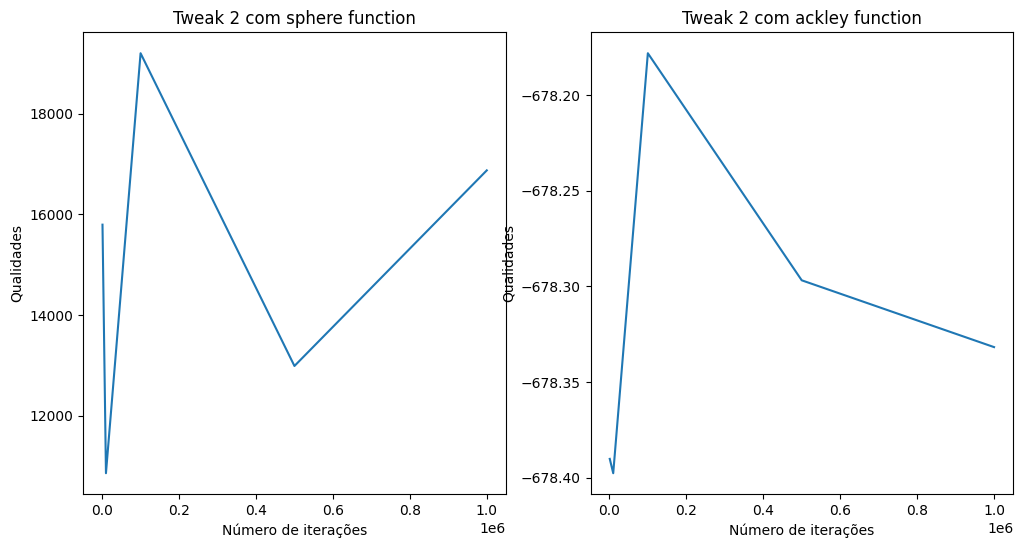

In [11]:
best_sphere, m_sphere = grid_search(sphere_function, simulated_annealing)
print(f"Melhor combinação usando a Sphere Function encontrada: raio = {best_sphere[0]}, probabilidade = {best_sphere[1]}")
print('\nMatriz raio x probabilidade:\n', m_sphere, '\n\n')

best_ackley, m_ackley = grid_search(ackley_function, simulated_annealing)
print(f"Melhor combinação usando a Ackley Function encontrada: raio = {best_ackley[0]}, probabilidade = {best_ackley[1]}")
print('\nMatriz raio x probabilidade:\n', m_ackley, '\n\n')

sphere = itera_teste(best_sphere, sphere_function, iteracoes, simulated_annealing)
ackley = itera_teste(best_ackley, ackley_function, iteracoes, simulated_annealing)

plota(sphere, ackley, iteracoes, '2', 'Número de iterações')